<a href="https://colab.research.google.com/github/NikhilDasgupta123/Internship-Project/blob/main/Mielage_Prediction_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mielage Prediction - Regression Analysis

# Objective
Is to predict predict Mileage

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/MPG.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Describe Data and Data Preprocessing

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Remove Missing Values

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
df['horsepower'].mean()

104.46938775510205

In [ ]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())

# Data Visualization

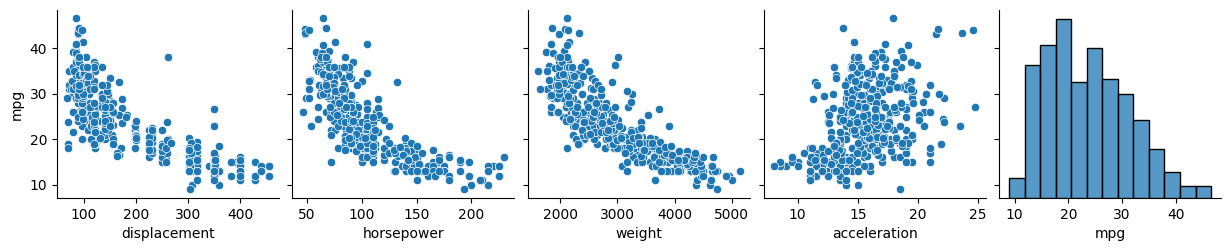

In [ ]:
sns.pairplot(df,x_vars=['displacement', 'horsepower', 'weight',
       'acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

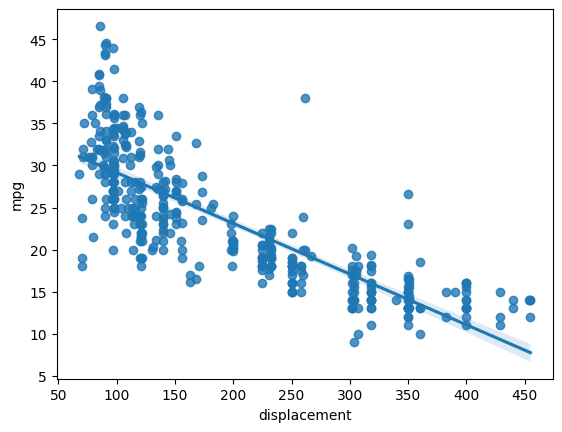

In [ ]:
sns.regplot(x='displacement',y='mpg',data=df)

# Define Target Variable (y) and Feature Variables (X)

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y=df['mpg']
X=df[['displacement', 'horsepower', 'weight',
       'acceleration']]

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2529)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((298, 4), (100, 4), (298,), (100,))

# Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
X=ss.fit_transform(X)
X

array([[ 1.0906037 ,  0.66919608,  0.63086987, -1.29549834],
       [ 1.5035143 ,  1.58659918,  0.85433297, -1.47703779],
       [ 1.19623199,  1.19342642,  0.55047045, -1.65857724],
       ...,
       [-0.56103873, -0.53653371, -0.79858454, -1.4407299 ],
       [-0.70507731, -0.66759129, -0.40841088,  1.10082237],
       [-0.71467988, -0.58895674, -0.29608816,  1.39128549]])

In [ ]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,1.785283e-17,-3.570567e-17,1.785283e-17,-5.355850e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.204411e+00,-1.532571e+00,-1.604943e+00,-2.747814e+00
25%,-8.563178e-01,-7.462258e-01,-8.828266e-01,-6.328794e-01
50%,-4.314040e-01,-2.482070e-01,-1.973624e-01,-2.472221e-02
75%,6.584879e-01,5.381385e-01,7.538337e-01,5.834349e-01
max,2.511784e+00,3.290348e+00,2.565185e+00,3.351912e+00


# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [ ]:
model.intercept_

44.115789252477626

In [ ]:
model.coef_

array([-0.00195321, -0.03350004, -0.00615301,  0.10339414])

### Mileage = 44.1 - (-0.001)*Disp - (-0.033)*HorsePwr - (-0.006)*Weight - 0.10*Acceleration + error

# Prediction

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([15.59162132, 31.328359  , 19.16917394, 24.26760831, 32.92729656,
       29.7630149 , 25.44974643, 12.48648755,  8.8457777 , 29.00590599,
       30.83067756, 21.03355498, 31.96258813, 14.80221313, 20.60070508,
       15.11689794, 24.71769289, 32.09458521, 14.42280337, 11.01221112,
       18.46526927, 30.77458845, 26.71168199, 18.8417451 , 20.30704429,
       26.61412343, 33.21413975, 30.63822286,  9.49645942, 25.83847387,
        8.05672023, 27.08134285, 30.85954131, 22.26964404, 17.73533454,
       21.22499035,  9.85327264, 22.63909026, 31.3583593 , 33.78503949,
       24.93417241, 31.37418832, 27.37584891, 17.98984415, 22.67487071,
       23.94666477, 20.60123416, 29.48017843, 24.03708714, 24.65328121,
       27.46739455, 12.70283109, 23.09747366, 32.78293179, 19.18976037,
       14.0692125 , 30.87570801, 27.19353659, 21.39673479, 29.87730903,
       23.7145974 , 31.98174684, 23.96293199,  8.03859031, 32.01356603,
       19.97956495, 27.37644647, 21.63422901, 11.19401193, 28.92

# Model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.15895983744560352

In [ ]:
r2_score(y_test,y_pred)

0.6769302456723378

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

In [ ]:
X_train2= poly.fit_transform(X_train)
X_test2= poly.fit_transform(X_test)

In [ ]:
model.fit(X_train2,y_train)

LinearRegression()

In [ ]:
model.intercept_

93.00242623157978

In [ ]:
model.coef_

array([ 0.00000000e+00, -1.94460781e-01, -3.07231124e-01,  6.06501745e-03,
       -4.17142432e+00, -2.97048528e-04,  1.17273892e-03,  4.70319973e-05,
        1.99999195e-03,  3.67771504e-04, -1.03039369e-04,  1.36794103e-02,
       -4.47784588e-07, -3.48400156e-04,  1.04455892e-01])

In [ ]:
y_pred=model.predict(X_test2)
y_pred

array([14.72939933, 32.59961059, 19.59203523, 23.21285849, 34.49451287,
       29.06857389, 21.83981691, 13.94196613, 13.19956187, 28.03882302,
       31.40961179, 19.24098566, 33.54552449, 14.57780292, 19.01373772,
       14.92075243, 22.70435682, 34.27510723, 14.17220224, 12.00186622,
       16.24310057, 32.13399963, 25.71899341, 16.83967765, 17.2087227 ,
       23.65819073, 34.67267273, 32.06370523, 15.94442785, 24.63313128,
       14.22481165, 27.49527051, 32.69033126, 21.68822004, 19.38109631,
       21.41074924, 10.04049723, 19.95833957, 32.18511753, 36.37826389,
       21.51142861, 32.41037002, 26.65912979, 13.87162536, 20.90076448,
       22.39820986, 19.56436031, 30.20312222, 20.76782795, 23.91434819,
       27.35891982, 14.09132498, 19.47237169, 34.86939938, 18.16894002,
       14.16401758, 31.7907575 , 26.77411642, 19.577566  , 31.57621224,
       22.80088191, 34.94893771, 19.37463961, 11.94156377, 34.52025806,
       18.4668521 , 26.13843287, 19.74762799, 13.60392874, 28.31

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.12717048897373656

In [ ]:
r2_score(y_test,y_pred)

0.7059071447865579

# Explaination

In in the Dataset I have use the two modelling technique Linear Regression and Polynomial Regression which give their own accuracy.

By applying modeling I get best accuracy in Polynomial Regression
with score 70%